In [34]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from eofs.xarray import Eof
from utility import analysis_parameters as ap
import cartopy.crs as ccrs


In [35]:
model="GEOS"
region="GT"
var="rlut"

In [36]:
olr = ap.open_file(model+"r1deg", region, var)[var]
olr

<xarray.DataArray 'rlut' (time: 2976, lat: 60, lon: 360)>
[64281600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-29T23:45:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      upwelling_longwave_flux_at_toa
    units:          W m-2
    origin:         OLR

In [37]:
solver = Eof(olr)

In [38]:
pcs = solver.pcs(npcs=3, pcscaling=1)

In [39]:
eofs = solver.eofs(neofs=3, eofscaling=1)
eofs

<xarray.DataArray 'eofs' (mode: 3, lat: 60, lon: 360)>
array([[[ 2.90722210e-06,  2.61591185e-06,  2.05899528e-06, ...,
          2.25759572e-06,  2.55662735e-06,  2.80029326e-06],
        [ 2.45081515e-06,  1.78944083e-06,  1.53328165e-06, ...,
          3.22321989e-06,  3.06133416e-06,  3.05854383e-06],
        [ 2.03548007e-06,  1.69779719e-06,  1.13489239e-06, ...,
          3.35703658e-06,  3.04038190e-06,  2.42272677e-06],
        ...,
        [-1.15132534e-05, -1.15537468e-05, -1.23416985e-05, ...,
         -1.21937692e-05, -1.20579562e-05, -1.17810496e-05],
        [-1.22997053e-05, -1.23751897e-05, -1.24301096e-05, ...,
         -1.13234046e-05, -1.18658209e-05, -1.22280335e-05],
        [-1.09969387e-05, -1.10934243e-05, -1.09470111e-05, ...,
         -9.71566806e-06, -1.01455789e-05, -1.04173287e-05]],

       [[ 2.59944272e-06,  2.12326131e-06,  1.58776800e-06, ...,
          1.68368160e-06,  2.00920954e-06,  2.32544789e-06],
        [ 1.89818377e-06,  1.35308949e-06,  1.37189954e-06, ...,
          2.21315690e-06,  2.05741844e-06,  2.26416932e-06],
        [ 1.85469787e-06,  1.79248786e-06,  1.01830119e-06, ...,
          2.32674211e-06,  2.26101361e-06,  2.02091110e-06],
...
          2.92367463e-06,  2.47209255e-06,  1.79097322e-06],
        [-1.61717807e-07, -4.33198551e-07, -4.31953993e-07, ...,
          1.50404526e-06,  9.21367700e-07,  3.85516273e-07],
        [-1.43964041e-06, -1.79378605e-06, -1.62372669e-06, ...,
          3.92008616e-07, -1.78614854e-07, -7.46217609e-07]],

       [[-5.06319111e-07, -3.36215948e-07, -1.72305775e-07, ...,
         -2.25173821e-07, -2.76154083e-07, -3.58166830e-07],
        [-3.57629460e-07, -1.49434840e-07,  3.73692046e-07, ...,
         -1.77504624e-08, -1.40200513e-07, -1.54854646e-07],
        [-4.32951680e-07, -3.11444914e-08,  1.43750441e-07, ...,
         -3.87608026e-07, -4.78137736e-07, -5.09661390e-07],
        ...,
        [-7.74109310e-07,  7.77292030e-07,  1.55040880e-06, ...,
         -9.28068584e-06, -5.38691847e-06, -1.72248224e-06],
        [-4.23144229e-06, -3.45738817e-06, -2.12266582e-06, ...,
         -9.64327319e-06, -8.32899423e-06, -5.82100347e-06],
        [-6.18910144e-06, -5.32205831e-06, -3.70733233e-06, ...,
         -7.40742234e-06, -7.73773809e-06, -6.58485988e-06]]],
      dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
  * lat      (lat) float64 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    long_name:  empirical_orthogonal_functions

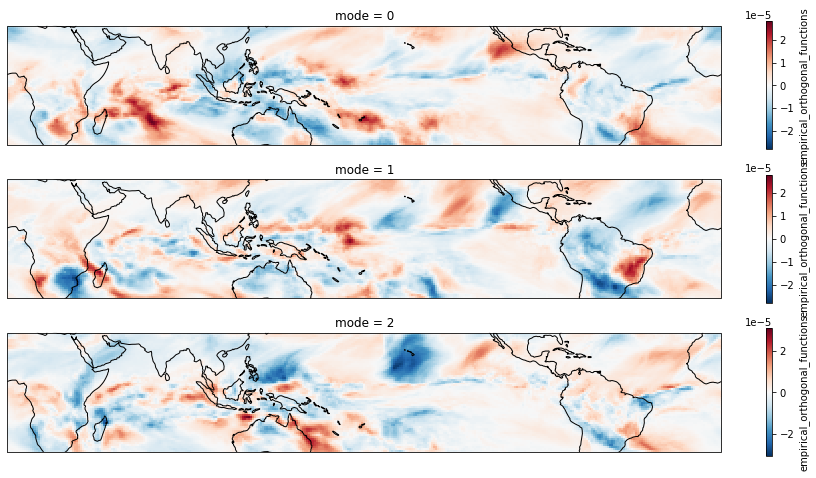

In [41]:
fig, ax = plt.subplots(3,1, figsize=(16,8),
                       subplot_kw=dict(projection=ccrs.LambertCylindrical(central_longitude=180.0)))
for i in range(3):
    eofs.isel(mode=i).plot(ax=ax[i], transform=ccrs.LambertCylindrical())
    ax[i].coastlines()  # cartopy function
    
plt.show()